<a href="https://colab.research.google.com/github/lferodrigues/Metrado-CC-UFJF/blob/main/Classifica%C3%A7%C3%A3o_de_emo%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de emoções

## Importação das bibliotecas

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

## Carregamento das imagens

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Datasets/fer2013_2_classes.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

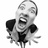

In [ ]:
tf.keras.preprocessing.image.load_img('/content/fer2013_2_classes/train/Angry/1003.jpg')

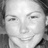

In [ ]:
imagem = tf.keras.preprocessing.image.load_img('/content/fer2013_2_classes/train/Happy/1.jpg')
imagem

### Bases de treinamento e teste

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/fer2013_2_classes/train',
                                                        target_size = (48, 48),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 11210 images belonging to 2 classes.


In [ ]:
dataset_treinamento.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
np.unique(dataset_treinamento.classes, return_counts=True)

(array([0, 1], dtype=int32), array([3995, 7215]))

In [ ]:
dataset_treinamento.class_indices

{'Angry': 0, 'Happy': 1}

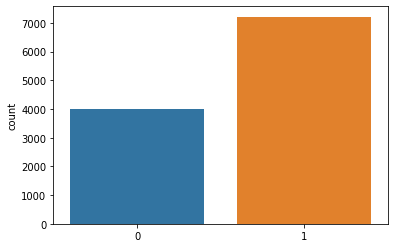

In [ ]:
sns.countplot(x = dataset_treinamento.classes);

In [ ]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/fer2013_2_classes/validation',
                                                  target_size = (48, 48),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 1370 images belonging to 2 classes.


## Construção e treinamento da rede neural

In [ ]:
num_detectors = 32
num_classes = 2
width, height = 48, 48
epochs = 50

network = Sequential()

network.add(Conv2D(num_detectors, (3, 3), activation = 'relu', padding = 'same', input_shape = (width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3, 3), activation = 'relu', padding = "same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Flatten())
network.add(Dense(2*num_detectors, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2*num_detectors, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))

print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [ ]:
network.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
network.fit(dataset_treinamento, epochs=epochs)

Epoch 1/50
701/701 [==============================] - 58s 35ms/step - loss: 0.7104 - accuracy: 0.6120
Epoch 2/50
701/701 [==============================] - 24s 35ms/step - loss: 0.5399 - accuracy: 0.7311
Epoch 3/50
701/701 [==============================] - 25s 35ms/step - loss: 0.4157 - accuracy: 0.8083
Epoch 4/50
701/701 [==============================] - 25s 35ms/step - loss: 0.3847 - accuracy: 0.8318
Epoch 5/50
701/701 [==============================] - 25s 35ms/step - loss: 0.3540 - accuracy: 0.8469
Epoch 6/50
701/701 [==============================] - 25s 36ms/step - loss: 0.3365 - accuracy: 0.8550
Epoch 7/50
701/701 [==============================] - 25s 36ms/step - loss: 0.3197 - accuracy: 0.8639
Epoch 8/50
701/701 [==============================] - 25s 36ms/step - loss: 0.3060 - accuracy: 0.8715
Epoch 9/50
701/701 [==============================] - 25s 35ms/step - loss: 0.3057 - accuracy: 0.8715
Epoch 10/50
701/701 [==============================] - 25s 36ms/step - loss: 0.287

## Avaliação da rede neural

In [ ]:
network.evaluate(dataset_teste)

1370/1370 [==============================] - 10s 7ms/step - loss: 0.9531 - accuracy: 0.9241


[0.9530779719352722, 0.9240875840187073]

In [ ]:
previsoes = network.predict(dataset_teste)
previsoes

array([[9.9917138e-01, 8.2864356e-04],
       [9.9999440e-01, 5.5774931e-06],
       [9.9442166e-01, 5.5783088e-03],
       ...,
       [1.1267455e-02, 9.8873258e-01],
       [1.9753634e-06, 9.9999797e-01],
       [1.0855241e-09, 1.0000000e+00]], dtype=float32)

In [ ]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
dataset_teste.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.9240875912408759

In [ ]:
dataset_teste.class_indices

{'Angry': 0, 'Happy': 1}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
cm

array([[466,  25],
       [ 79, 800]])

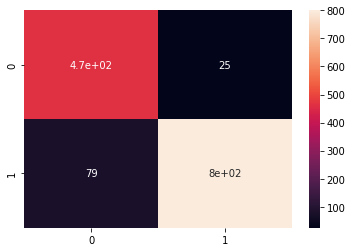

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       491
           1       0.97      0.91      0.94       879

    accuracy                           0.92      1370
   macro avg       0.91      0.93      0.92      1370
weighted avg       0.93      0.92      0.92      1370

